In [1]:
import numpy as np
import pandas as pd

from sklearn import linear_model as lm, metrics, cross_validation as cv,\
                    grid_search, feature_selection, preprocessing

from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data loading and cleaning

In [2]:
#The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

bank = pd.read_csv('../../Data/bank-additional/bank-additional-full.csv', sep=';')
bank.dropna(inplace=True)

In [3]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
bank_subset = bank[['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week', 'poutcome', 'y']]
bank_dummies = pd.get_dummies(bank_subset)
bank_dummies = bank_dummies.astype('int')

In [7]:
bank_dummies.drop(['job_unemployed', 'marital_single', 'education_illiterate', 'default_no', 'housing_no',
                   'loan_no', 'contact_telephone', 'day_of_week_mon', 'poutcome_failure', 'y_no'], axis=1, inplace=True)

In [8]:
bank_final = pd.concat([bank['age'], bank['campaign'], bank['pdays'], bank['previous'], bank['emp.var.rate'],
                       bank['cons.price.idx'], bank['cons.conf.idx'], bank['euribor3m'], bank['nr.employed'],
                       bank_dummies], axis=1)

# Initial exploratory analysis (summary statistics & visualisations)

In [9]:
pd.crosstab(bank.y, bank.day_of_week)

day_of_week,fri,mon,thu,tue,wed
y,,,,,
no,6981,7667,7578,7137,7185
yes,846,847,1045,953,949


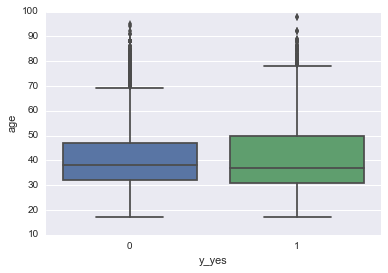

In [154]:
sns.boxplot(x='y_yes', y='age', data=bank_final)

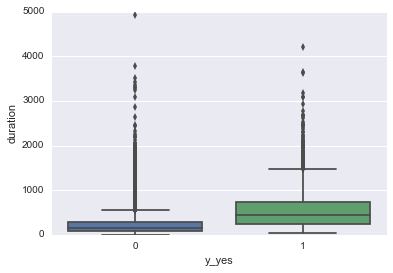

In [155]:
sns.boxplot(x='y_yes', y='duration', data=bank_final)

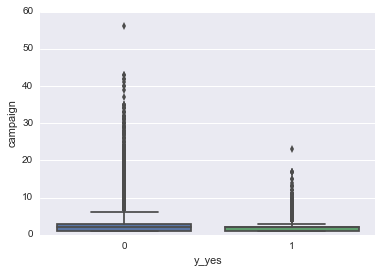

In [156]:
sns.boxplot(x='y_yes', y='campaign', data=bank_final)

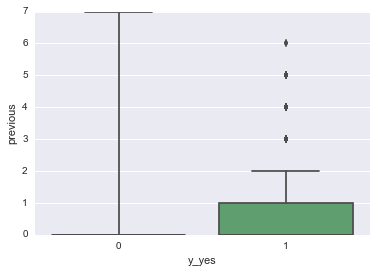

In [158]:
sns.boxplot(x='y_yes', y='previous', data=bank_final)

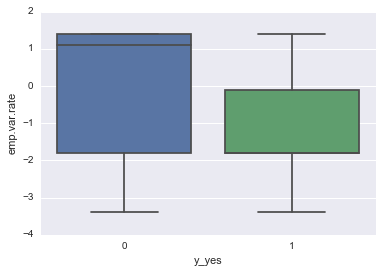

In [159]:
sns.boxplot(x='y_yes', y='emp.var.rate', data=bank_final)

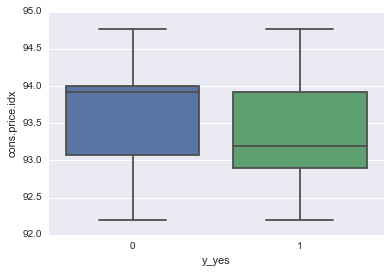

In [160]:
sns.boxplot(x='y_yes', y='cons.price.idx', data=bank_final)

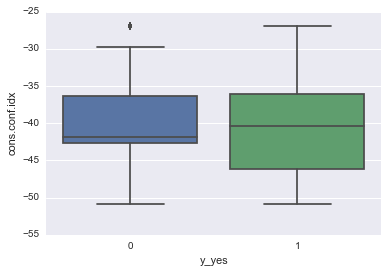

In [161]:
sns.boxplot(x='y_yes', y='cons.conf.idx', data=bank_final)

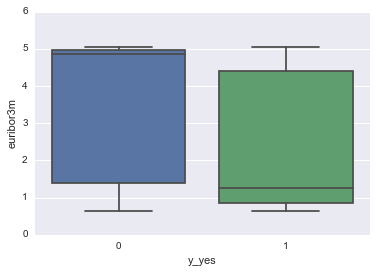

In [162]:
sns.boxplot(x='y_yes', y='euribor3m', data=bank_final)

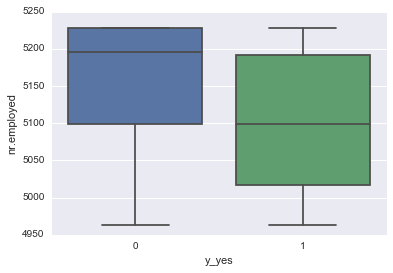

In [163]:
sns.boxplot(x='y_yes', y='nr.employed', data=bank_final)

# Modelling (logistic regression)

In [10]:
bank_final.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unknown', 'marital_divorced',
       'marital_married', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_succe

In [11]:
X = bank_final.iloc[:,:53]
y = bank_final.y_yes

In [13]:
model1 = lm.LogisticRegression(C=1e50)
model1.fit(X, y)

LogisticRegression(C=1e+50, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
np.exp(model1.intercept_)
np.exp(model1.coef_)

array([[ 1.00159574,  0.95791148,  0.99824624,  0.81657658,  0.80773369,
         1.48168621,  1.01721911,  0.94030145,  0.99289378,  1.01997675,
         0.87292345,  0.97455129,  0.97900046,  0.96860054,  1.17193069,
         0.99040336,  0.92122553,  1.13771405,  1.00647513,  0.99080879,
         0.91735894,  0.93222486,  1.00578203,  0.9735711 ,  1.00985613,
         0.9320085 ,  0.97871742,  1.00604302,  1.04736354,  1.05449597,
         0.80118461,  0.99944266,  0.98698397,  0.96550498,  0.98698397,
         0.97160611,  1.5134842 ,  1.03236708,  1.05990757,  1.04443697,
         1.34248335,  1.11178351,  1.40827637,  0.51064294,  0.85032566,
         1.02215242,  0.940398  ,  1.02787378,  1.10970501,  1.10512081,
         1.20219647,  1.29966116,  1.06414716]])

In [18]:
metrics.confusion_matrix(y, model1.predict(X))

array([[36004,   544],
       [ 3560,  1080]])

In [19]:
metrics.accuracy_score(y, model1.predict(X))
#metrics.accuracy_score(y, model1.predict(X))

0.90035932795959983

# Cross-Validation

In [20]:
# Define stratified folds
kf = cv.StratifiedKFold(y, n_folds=5, shuffle=True)

In [21]:
accuracies = cv.cross_val_score(lm.LogisticRegression(C=1e50), X, y, scoring='accuracy', cv=kf)
print(accuracies)
accuracies.mean()

[ 0.90009711  0.89718378  0.90106822  0.89899235  0.90093481]


0.89965525436168847

In [22]:
# Looking at different scoring method; Area Under Curve
auc = cv.cross_val_score(lm.LogisticRegression(C=1e50), X, y, scoring='roc_auc', cv=kf)
print(auc)
auc.mean()

[ 0.7863619   0.77381222  0.7874717   0.78675647  0.77670693]


0.78222184401489314

# Regularisation

In [23]:
Cs = np.logspace(-4, 4, 10)
gs = grid_search.GridSearchCV(
    estimator=lm.LogisticRegression(),
    param_grid={'C': Cs},
    scoring='roc_auc',
    cv=kf
)
gs.fit(X, y)

GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[0 0 ..., 1 0], n_folds=5, shuffle=True, random_state=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-04,   7.74264e-04,   5.99484e-03,   4.64159e-02,
         3.59381e-01,   2.78256e+00,   2.15443e+01,   1.66810e+02,
         1.29155e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [24]:
gs.best_score_

0.78823227314863742

In [25]:
gs.best_estimator_

LogisticRegression(C=21.544346900318821, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [26]:
gs.grid_scores_

[mean: 0.75996, std: 0.00742, params: {'C': 0.0001},
 mean: 0.77001, std: 0.01127, params: {'C': 0.00077426368268112698},
 mean: 0.78347, std: 0.00466, params: {'C': 0.0059948425031894088},
 mean: 0.78532, std: 0.01148, params: {'C': 0.046415888336127774},
 mean: 0.78469, std: 0.00908, params: {'C': 0.35938136638046259},
 mean: 0.78631, std: 0.00995, params: {'C': 2.7825594022071258},
 mean: 0.78823, std: 0.00882, params: {'C': 21.544346900318821},
 mean: 0.78759, std: 0.00955, params: {'C': 166.81005372000558},
 mean: 0.78666, std: 0.00935, params: {'C': 1291.5496650148827},
 mean: 0.78766, std: 0.00885, params: {'C': 10000.0}]

In [27]:
# Not sure how to get C from the best model found in grid search so building again:
model2 = lm.LogisticRegressionCV(Cs=10, cv=kf, scoring='roc_auc')
model2.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None,
           cv=sklearn.cross_validation.StratifiedKFold(labels=[0 0 ..., 1 0], n_folds=5, shuffle=True, random_state=None),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring='roc_auc',
           solver='lbfgs', tol=0.0001, verbose=0)

In [28]:
model2.C_

array([ 0.04641589])

In [29]:
# Recursive Feature Elimination and Cross-Validated selection
fs = feature_selection.RFECV(lm.LogisticRegression(C=model2.C_[0]), cv=kf, scoring='roc_auc')
fs.fit(X, y)

# List selected variables
X.columns[fs.support_]

Index(['campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_retired', 'job_services',
       'job_student', 'job_technician', 'marital_divorced', 'marital_married',
       'education_basic.4y', 'education_basic.9y', 'education_high.school',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'housing_unknown', 'loan_yes', 'contact_cellular', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [31]:
X.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unknown', 'marital_divorced',
       'marital_married', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_succe

In [34]:
X2 = bank_final[['campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 
               'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_retired', 'job_services', 'job_student', 
               'job_technician', 'marital_divorced', 'marital_married', 'education_basic.4y', 'education_basic.9y', 
               'education_high.school', 'education_university.degree', 'education_unknown', 'default_unknown', 
               'housing_unknown', 'loan_yes', 'contact_cellular', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 
               'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_thu', 
               'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success']]

In [35]:
model3 = lm.LogisticRegressionCV(Cs=10, cv=kf, scoring='roc_auc')
model3.fit(X2, y)

LogisticRegressionCV(Cs=10, class_weight=None,
           cv=sklearn.cross_validation.StratifiedKFold(labels=[0 0 ..., 1 0], n_folds=5, shuffle=True, random_state=None),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring='roc_auc',
           solver='lbfgs', tol=0.0001, verbose=0)